In [101]:
result_file = 'result.csv'
model = 'nyc-taxi-green-dec-2016_d10_l376_n751_20240921090731'

In [102]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
496,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,0,0.000000,nyc-taxi-green-dec-2016,1G,2,1.583588
497,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,1,0.448400,nyc-taxi-green-dec-2016,1G,2,1.379847
498,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,2,0.448400,nyc-taxi-green-dec-2016,1G,2,1.381671
499,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,1,0.886850,nyc-taxi-green-dec-2016,1G,2,1.406931
500,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,2,0.886850,nyc-taxi-green-dec-2016,1G,2,1.432724
501,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,1,1.325300,nyc-taxi-green-dec-2016,1G,2,1.397217
502,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,2,1.325300,nyc-taxi-green-dec-2016,1G,2,1.291408
503,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,1,1.763750,nyc-taxi-green-dec-2016,1G,2,1.234062
504,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,2,1.763750,nyc-taxi-green-dec-2016,1G,2,1.154781
505,nyc-taxi-green-dec-2016_d10_l376_n751_20240921...,1,2.202200,nyc-taxi-green-dec-2016,1G,2,1.023711


In [103]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 1.6207641167178128)

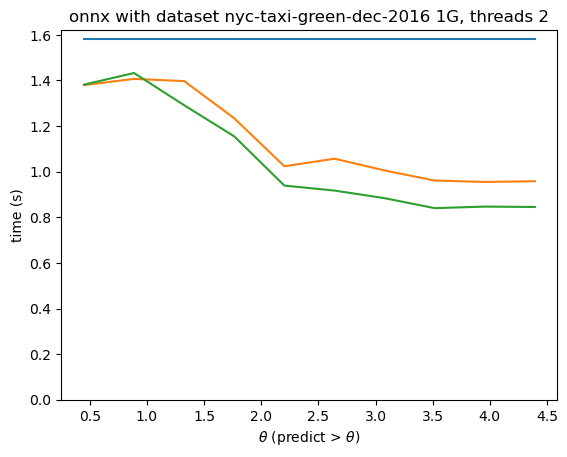

In [104]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))])
plt.plot(x, y1)
if len(y2) > 0:
    plt.plot(x, y2)
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.ylim(0)

(0.0, 1.9293395894709706)

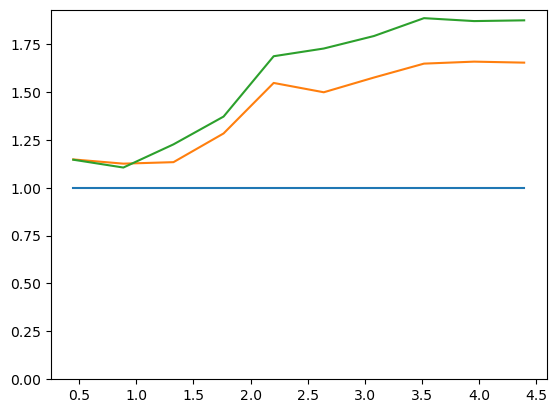

In [105]:
plt.plot(x, [1 for _ in range(len(x))])
plt.plot(x, base_line / y1)
if len(y2) > 0:
    plt.plot(x, base_line / y2)
plt.ylim(0)